In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#del [[order_prior, order_train, user_groupby, order_combined, items_per_order, orders2, dow_groupby, hod_groupby, long_since_prior, short_since_prior]]

gc.collect()

NameError: name 'gc' is not defined

In [13]:
pwd

'/Users/YunseonLee/BootCamp/Practice_Files/instacart-market-basket-analysis/Instacart/Sunny'

In [14]:
order_prior = pd.read_csv('/Users/YunseonLee/BootCamp/Practice_Files/instacart-market-basket-analysis/Instacart/data/order_products__prior.csv')
# order_train = pd.read_csv("Instacart/data/order_products__train.csv")
# orders = pd.read_csv("orders.csv")

In [24]:
print(order_prior.shape)
order_prior.sample(5)

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
11878624,1254109,39275,3,1
28566841,3012742,27845,3,1
16845078,1776884,9006,48,1
32154794,3391685,7969,4,0
17152117,1809341,42265,9,0


In [28]:
len(order_prior['order_id'].unique())

3214874

In [25]:
print(order_train.shape)
order_train.sample(5)

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
327207,796960,14722,11,1
64883,159811,34,7,1
597091,1468630,43352,2,1
370021,903321,14289,18,1
1028362,2542900,45535,5,1


In [29]:
len(order_train['order_id'].unique())

131209

In [27]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [5]:
orders.sample(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
453804,1587980,27328,prior,20,0,16,0.0
2626347,2941148,158123,prior,16,0,11,13.0
1627418,573666,97710,prior,1,0,8,NaN
1945702,1179870,116843,prior,25,2,16,8.0
2046066,3416729,122941,prior,2,0,13,14.0


In [6]:
orders.shape

(3421083, 7)

In [8]:
len(orders['order_id'].unique())

3421083

In [9]:
len(orders['user_id'].unique())

206209

In [14]:
user_groupby = orders.groupby('user_id')['order_id'].count()

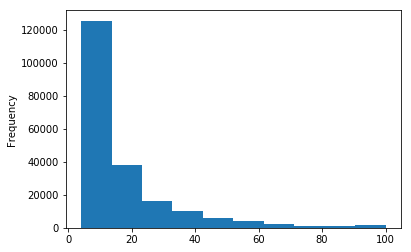

<Figure size 432x288 with 0 Axes>

In [21]:
user_groupby.plot.hist()

plt.show()
plt.clf()

In [22]:
user_groupby.describe()

count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: order_id, dtype: float64

#### Going to merge the count of items onto the orders.csv

In [34]:
order_combined = pd.concat([order_prior,order_train],ignore_index=True)


In [37]:
print(order_combined.shape)
order_combined.sample(5)

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
5090544,537416,2361,2,1
26963660,2843149,43967,9,1
7199018,760159,41372,3,1
18653477,1967663,4210,3,1
5238048,552781,41468,1,0


In [39]:
items_per_order = order_combined.groupby('order_id')['reordered'].agg({'count','sum'})


In [41]:
orders2 = orders.merge(items_per_order, left_on = 'order_id', right_on = 'order_id')


In [42]:
orders2.sample(5)

#count = number of items in the order 
#sum = number of reorders out of the total number of items in the order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,sum,count
1381603,407193,84874,prior,3,3,10,6.0,2,7
1299205,1663440,79810,train,6,4,7,30.0,6,8
1524513,295903,93609,prior,18,4,16,12.0,4,6
2972856,1065204,183375,prior,7,0,8,7.0,19,26
432353,97939,26594,prior,6,1,12,8.0,2,11


In [83]:
orders2['reorder_ratio'] = orders2['sum'] / orders2['count']

#### Time Bought Analysis: 
- Number of orders
- How much people buy 

In [43]:
dow_groupby = orders2.groupby('order_dow')['order_id'].count()
hod_groupby = orders2.groupby('order_hour_of_day')['order_id'].count()

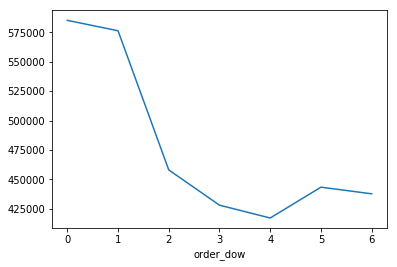

<Figure size 432x288 with 0 Axes>

In [49]:
dow_groupby.plot.line()
plt.show()
plt.clf()

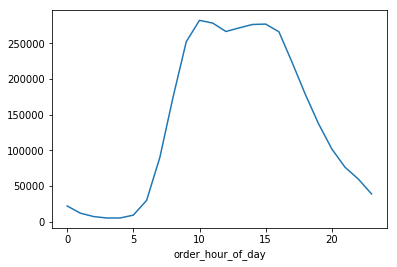

<Figure size 432x288 with 0 Axes>

In [50]:
hod_groupby.plot.line()
plt.show()
plt.clf()

In [51]:
dow_items_groupby = orders2.groupby('order_dow')['count'].sum()
hod_items_groupby = orders2.groupby('order_hour_of_day')['count'].sum()

In [63]:
orders2['count'].describe()

count    3.346083e+06
mean     1.010707e+01
std      7.542326e+00
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.400000e+01
max      1.450000e+02
Name: count, dtype: float64

#### Relation of "days since ordered" 

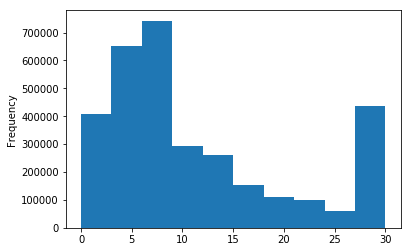

In [82]:
orders['days_since_prior_order'].plot.hist()

In [86]:
orders2.sample(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,sum,count,reorder_ratio
581477,1380416,35828,prior,49,6,9,7.0,7,11,0.636364
3092903,1923712,190667,prior,1,0,15,NaN,0,4,0.000000
1309715,367599,80428,prior,50,1,10,7.0,7,7,1.000000
3320113,1908845,204579,prior,30,0,9,8.0,5,14,0.357143
1961879,111723,120533,prior,5,0,9,29.0,3,6,0.500000


In [88]:
orders2['days_since_prior_order'].isnull().sum() / orders2.shape[0]
#6% missingness for the days since prior order 

0.06162698295290344

In [92]:
#Set the number of "too much waiting" at 25 days since prior order 
long_since_prior = orders2[orders2['days_since_prior_order'] > 25]
long_since_prior.sample(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,sum,count,reorder_ratio
151908,1991659,9337,prior,3,4,7,30.0,2,2,1.000000
528414,798823,32580,prior,3,5,18,28.0,1,7,0.142857
999619,1573887,61441,prior,6,3,8,30.0,18,35,0.514286
2670214,2879999,164494,prior,22,1,15,30.0,7,9,0.777778
816173,423507,50130,prior,4,0,17,30.0,1,2,0.500000


In [93]:
long_since_prior.shape[0] / orders2.shape[0]

0.1284717085619215

In [95]:
len(long_since_prior['user_id'].unique())

159520

In [96]:
short_since_prior = orders2[orders2['days_since_prior_order'] <= 25]
len(short_since_prior['user_id'].unique())

196922

In [97]:
long_since_prior['reorder_ratio'].median()

0.5

In [98]:
short_since_prior['reorder_ratio'].median()

0.7142857142857143